# World Bank Ethiopia Capstone Project

## Stage 2: Exploratory Data Analysis (EDA)

### Project Overview
This notebook performs comprehensive exploratory data analysis (EDA) on Ethiopia's macroeconomic indicators. EDA is a critical step that helps us understand the data patterns, relationships, and characteristics before building forecasting models.

### Objectives
1. **Data Overview**: Load and inspect the cleaned dataset
2. **Time Series Visualization**: Plot individual indicators over time to identify trends
3. **Correlation Analysis**: Examine relationships between different economic indicators
4. **Data Quality Assessment**: Check for missing values, outliers, and data completeness
5. **Statistical Summary**: Generate descriptive statistics for each indicator
6. **Insights Generation**: Identify key patterns and prepare for modeling

### Key Indicators Analyzed
- **GDP (constant 2015 US$)**: Total economic output
- **GDP growth (annual %)**: Economic growth rate
- **GDP per capita (constant 2015 US$)**: Economic output per person
- **Inflation, consumer prices (annual %)**: Price level changes
- **Unemployment, total (% of total labor force)**: Labor market conditions


## Step 1: Import Libraries and Load Data

Import necessary libraries for data analysis and visualization, then load the cleaned dataset prepared in Stage 1.


In [ ]:
# Import required libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load the cleaned dataset from Stage 1
print("=" * 80)
print("STAGE 2: EXPLORATORY DATA ANALYSIS (EDA)")
print("=" * 80)

df_final = pd.read_csv("../datasets/cleaned/ethiopia_analytic_dataset.csv")
df = df_final.copy()

print(f"\n✓ Dataset loaded successfully!")
print(f"  - Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"  - Year range: {df['Year'].min()} to {df['Year'].max()}")

# Display first few rows
print("\n" + "=" * 80)
print("DATASET PREVIEW:")
print("=" * 80)
display(df.head())

,Year,gdp_constant,gdp_growth,gdp_per_capita,inflation,unemployment
0,1961,5.263329e+09,NaN,240.267722,NaN,NaN
1,1962,5.491026e+09,4.326091,244.424432,NaN,NaN
2,1963,5.739145e+09,4.518634,248.969086,NaN,NaN
3,1964,5.973904e+09,4.090486,252.419740,NaN,NaN
4,1965,6.318714e+09,5.771932,259.915858,NaN,NaN


## Step 2: Time Series Visualizations

Visualize each economic indicator over time to identify trends, patterns, and potential structural breaks. This helps us understand the historical evolution of Ethiopia's economy.


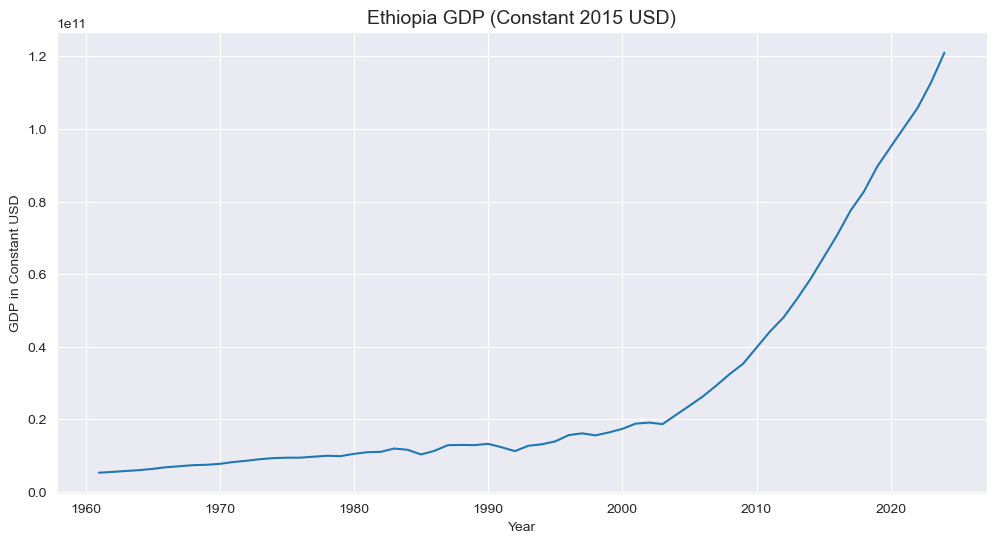

In [ ]:
# Visualize GDP (constant 2015 USD) over time
# This shows the overall economic growth trajectory of Ethiopia
fig, ax = plt.subplots(figsize=(14, 6))

# Plot GDP time series
ax.plot(df["Year"], df["gdp_constant"] / 1e9, linewidth=2, color='#2E86AB', label='GDP')

# Formatting
ax.set_title("Ethiopia GDP (Constant 2015 USD) - Time Series", fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("GDP (Billions USD)", fontsize=12)
ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(fontsize=11)

# Add annotations for key periods if needed
plt.tight_layout()
plt.show()

# Print summary statistics
gdp_clean = df["gdp_constant"].dropna()
if len(gdp_clean) > 0:
    print(f"\nGDP Summary Statistics:")
    print(f"  - First value (1961): ${gdp_clean.iloc[0]/1e9:.2f} billion")
    print(f"  - Last value ({df.loc[gdp_clean.index[-1], 'Year']}): ${gdp_clean.iloc[-1]/1e9:.2f} billion")
    print(f"  - Total growth: {(gdp_clean.iloc[-1]/gdp_clean.iloc[0] - 1)*100:.1f}%")
    print(f"  - Average: ${gdp_clean.mean()/1e9:.2f} billion")

### GDP Growth Rate

The GDP growth rate shows year-over-year economic expansion or contraction. Positive values indicate economic growth, while negative values indicate recession.


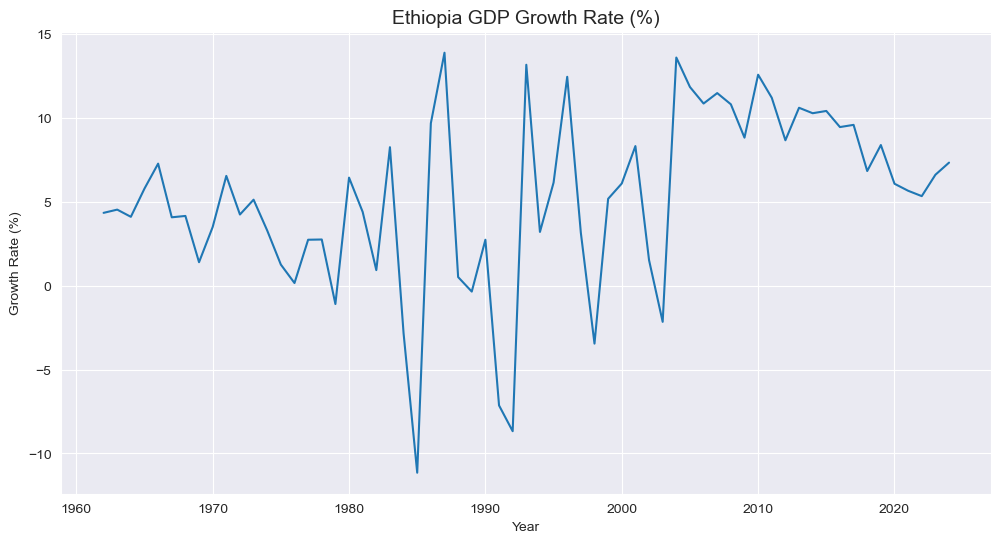

In [ ]:
# Visualize GDP growth rate over time
# Shows economic volatility and growth cycles
fig, ax = plt.subplots(figsize=(14, 6))

# Plot GDP growth with zero line reference
ax.plot(df["Year"], df["gdp_growth"], linewidth=2, color='#A23B72', label='GDP Growth')
ax.axhline(y=0, color='red', linestyle='--', alpha=0.5, label='Zero Growth Line')

# Formatting
ax.set_title("Ethiopia GDP Growth Rate (Annual %) - Time Series", fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Growth Rate (%)", fontsize=12)
ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(fontsize=11)

plt.tight_layout()
plt.show()

# Print summary statistics
growth_clean = df["gdp_growth"].dropna()
if len(growth_clean) > 0:
    print(f"\nGDP Growth Summary Statistics:")
    print(f"  - Average growth rate: {growth_clean.mean():.2f}%")
    print(f"  - Median growth rate: {growth_clean.median():.2f}%")
    print(f"  - Standard deviation: {growth_clean.std():.2f}%")
    print(f"  - Minimum: {growth_clean.min():.2f}% (Year: {df.loc[growth_clean.idxmin(), 'Year']})")
    print(f"  - Maximum: {growth_clean.max():.2f}% (Year: {df.loc[growth_clean.idxmax(), 'Year']})")

### Inflation Rate

Inflation measures the rate of price level increases. High inflation can erode purchasing power and affect economic stability.


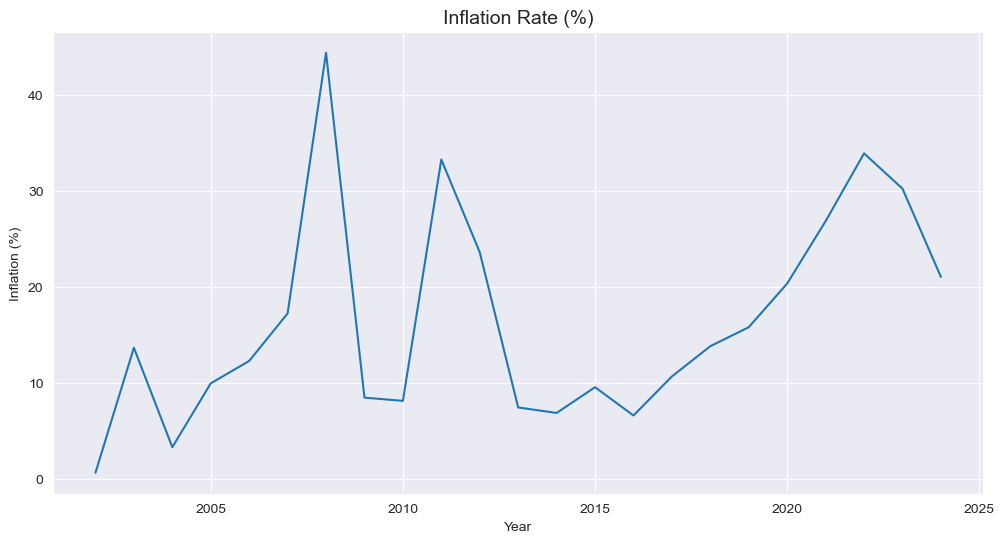

In [ ]:
# Visualize inflation rate over time
# High inflation periods indicate economic instability
fig, ax = plt.subplots(figsize=(14, 6))

# Plot inflation with reference lines
ax.plot(df["Year"], df["inflation"], linewidth=2, color='#F18F01', label='Inflation Rate')
ax.axhline(y=0, color='gray', linestyle='--', alpha=0.3)
ax.axhline(y=5, color='orange', linestyle='--', alpha=0.5, label='5% Reference')

# Formatting
ax.set_title("Ethiopia Inflation Rate (Consumer Prices, Annual %) - Time Series", fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Inflation Rate (%)", fontsize=12)
ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(fontsize=11)

plt.tight_layout()
plt.show()

# Print summary statistics
inflation_clean = df["inflation"].dropna()
if len(inflation_clean) > 0:
    print(f"\nInflation Summary Statistics:")
    print(f"  - Average inflation: {inflation_clean.mean():.2f}%")
    print(f"  - Median inflation: {inflation_clean.median():.2f}%")
    print(f"  - Standard deviation: {inflation_clean.std():.2f}%")
    print(f"  - Minimum: {inflation_clean.min():.2f}% (Year: {df.loc[inflation_clean.idxmin(), 'Year']})")
    print(f"  - Maximum: {inflation_clean.max():.2f}% (Year: {df.loc[inflation_clean.idxmax(), 'Year']})")

### Unemployment Rate

Unemployment rate measures the percentage of the labor force that is jobless. It's a key indicator of labor market health and economic conditions.


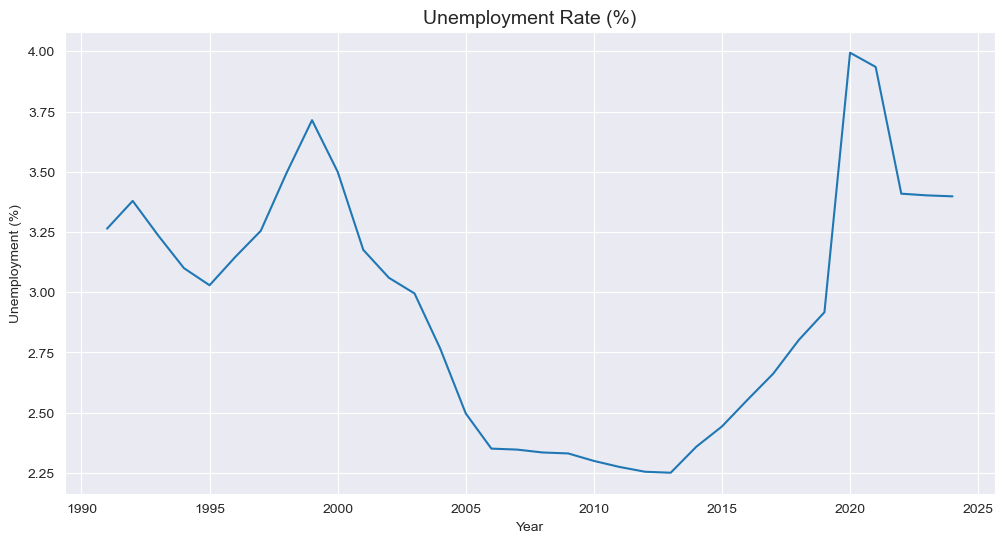

In [ ]:
# Visualize unemployment rate over time
# Shows labor market conditions and economic cycles
fig, ax = plt.subplots(figsize=(14, 6))

# Plot unemployment
ax.plot(df["Year"], df["unemployment"], linewidth=2, color='#C73E1D', label='Unemployment Rate', marker='o', markersize=3)

# Formatting
ax.set_title("Ethiopia Unemployment Rate (% of Total Labor Force) - Time Series", fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Unemployment Rate (%)", fontsize=12)
ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(fontsize=11)

plt.tight_layout()
plt.show()

# Print summary statistics
unemp_clean = df["unemployment"].dropna()
if len(unemp_clean) > 0:
    print(f"\nUnemployment Summary Statistics:")
    print(f"  - Average unemployment: {unemp_clean.mean():.2f}%")
    print(f"  - Median unemployment: {unemp_clean.median():.2f}%")
    print(f"  - Standard deviation: {unemp_clean.std():.2f}%")
    print(f"  - Minimum: {unemp_clean.min():.2f}% (Year: {df.loc[unemp_clean.idxmin(), 'Year']})")
    print(f"  - Maximum: {unemp_clean.max():.2f}% (Year: {df.loc[unemp_clean.idxmax(), 'Year']})")

### GDP Per Capita

GDP per capita measures average economic output per person, providing insight into living standards and economic development.


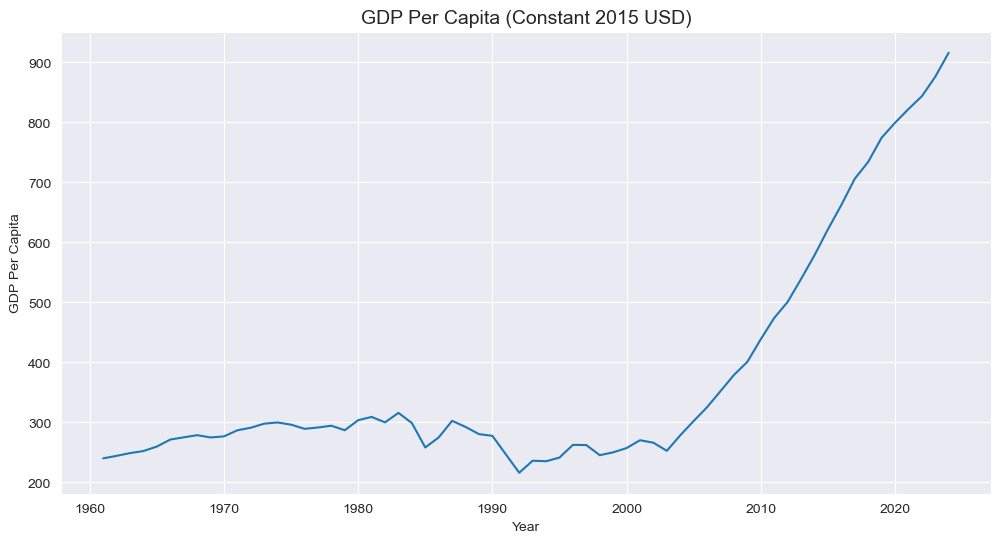

In [ ]:
# Visualize GDP per capita over time
# Shows improvement in living standards and economic development
fig, ax = plt.subplots(figsize=(14, 6))

# Plot GDP per capita
ax.plot(df["Year"], df["gdp_per_capita"], linewidth=2, color='#06A77D', label='GDP Per Capita')

# Formatting
ax.set_title("Ethiopia GDP Per Capita (Constant 2015 USD) - Time Series", fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("GDP Per Capita (USD)", fontsize=12)
ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(fontsize=11)

plt.tight_layout()
plt.show()

# Print summary statistics
gdp_pc_clean = df["gdp_per_capita"].dropna()
if len(gdp_pc_clean) > 0:
    print(f"\nGDP Per Capita Summary Statistics:")
    print(f"  - First value (1961): ${gdp_pc_clean.iloc[0]:.2f}")
    print(f"  - Last value ({df.loc[gdp_pc_clean.index[-1], 'Year']}): ${gdp_pc_clean.iloc[-1]:.2f}")
    print(f"  - Total growth: {(gdp_pc_clean.iloc[-1]/gdp_pc_clean.iloc[0] - 1)*100:.1f}%")
    print(f"  - Average: ${gdp_pc_clean.mean():.2f}")


## Step 3: Correlation Analysis

Examine relationships between different economic indicators using correlation analysis. This helps identify which indicators move together and can inform feature engineering for forecasting models.


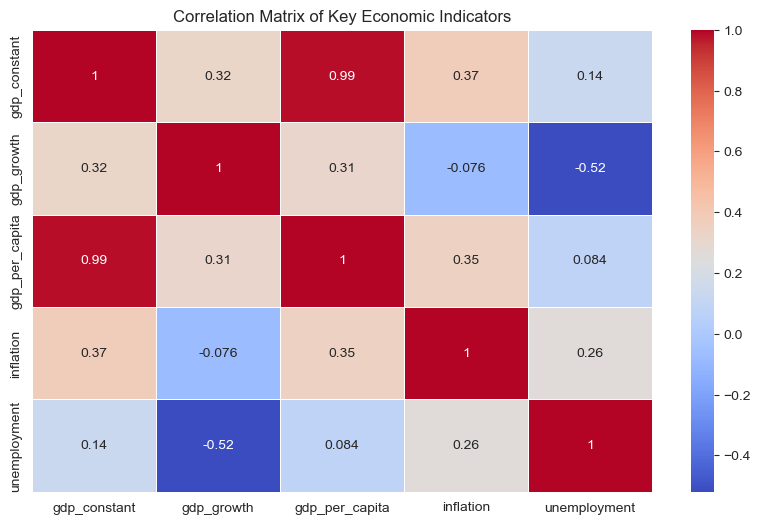

In [ ]:
# Calculate correlation matrix for all economic indicators
# This reveals relationships and dependencies between variables
print("=" * 80)
print("CORRELATION ANALYSIS")
print("=" * 80)

# Calculate correlation matrix (excluding Year column)
corr_matrix = df.drop(columns=["Year"]).corr()

# Create heatmap visualization
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    cmap="coolwarm", 
    center=0,
    linewidths=0.5,
    square=True,
    fmt='.2f',
    cbar_kws={"shrink": 0.8},
    vmin=-1, vmax=1
)
plt.title("Correlation Matrix of Key Economic Indicators", fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Print correlation insights
print("\nKey Correlation Insights:")
print("-" * 80)
for i, col1 in enumerate(corr_matrix.columns):
    for col2 in corr_matrix.columns[i+1:]:
        corr_val = corr_matrix.loc[col1, col2]
        if abs(corr_val) > 0.5:  # Strong correlation threshold
            strength = "Strong" if abs(corr_val) > 0.7 else "Moderate"
            direction = "positive" if corr_val > 0 else "negative"
            print(f"  {strength} {direction} correlation ({corr_val:.2f}): {col1} ↔ {col2}")

# Display correlation matrix as table
print("\n" + "=" * 80)
print("CORRELATION MATRIX (Numerical Values):")
print("=" * 80)
display(corr_matrix)

## Step 4: Comprehensive Statistical Summary

Generate descriptive statistics for all indicators to understand their distributions, central tendencies, and variability.


In [ ]:
# Generate comprehensive descriptive statistics
print("=" * 80)
print("DESCRIPTIVE STATISTICS SUMMARY")
print("=" * 80)

# Calculate statistics for each indicator
indicators = ['gdp_constant', 'gdp_growth', 'gdp_per_capita', 'inflation', 'unemployment']

summary_stats = df[indicators].describe()
print("\nDescriptive Statistics for All Indicators:")
print("-" * 80)
display(summary_stats)

# Additional statistics: skewness and kurtosis
print("\n" + "=" * 80)
print("DISTRIBUTION CHARACTERISTICS")
print("=" * 80)
from scipy import stats

dist_stats = []
for col in indicators:
    series_clean = df[col].dropna()
    if len(series_clean) > 0:
        dist_stats.append({
            'Indicator': col,
            'Skewness': stats.skew(series_clean),
            'Kurtosis': stats.kurtosis(series_clean),
            'Non-null Count': len(series_clean),
            'Null Count': df[col].isnull().sum()
        })

dist_df = pd.DataFrame(dist_stats)
display(dist_df)

# Missing data summary
print("\n" + "=" * 80)
print("MISSING DATA SUMMARY")
print("=" * 80)
missing_summary = df[indicators].isnull().sum()
missing_pct = (missing_summary / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_summary,
    'Missing Percentage': missing_pct
})
display(missing_df)


## Step 5: Combined Multi-Indicator Visualization

Create a comprehensive visualization showing all indicators together to identify patterns and relationships.


In [ ]:
# Create a comprehensive subplot visualization of all indicators
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
fig.suptitle('Ethiopia Economic Indicators - Comprehensive Overview', fontsize=18, fontweight='bold', y=0.995)

# Define indicator configurations
indicator_configs = [
    ('gdp_constant', 'GDP (Constant 2015 USD)', 'Billions USD', '#2E86AB', lambda x: x/1e9),
    ('gdp_growth', 'GDP Growth Rate (%)', 'Percentage', '#A23B72', lambda x: x),
    ('gdp_per_capita', 'GDP Per Capita', 'USD', '#06A77D', lambda x: x),
    ('inflation', 'Inflation Rate (%)', 'Percentage', '#F18F01', lambda x: x),
    ('unemployment', 'Unemployment Rate (%)', 'Percentage', '#C73E1D', lambda x: x)
]

# Plot each indicator
for idx, (col, title, ylabel, color, transform) in enumerate(indicator_configs):
    row = idx // 2
    col_idx = idx % 2
    ax = axes[row, col_idx]
    
    data = df[col].dropna()
    if len(data) > 0:
        years = df.loc[data.index, 'Year']
        ax.plot(years, transform(data.values), linewidth=2, color=color, label=title)
        ax.set_title(title, fontsize=13, fontweight='bold')
        ax.set_xlabel('Year', fontsize=11)
        ax.set_ylabel(ylabel, fontsize=11)
        ax.grid(True, alpha=0.3, linestyle='--')
        ax.legend(fontsize=10)

# Remove empty subplot
axes[2, 1].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

print("\n✓ Comprehensive visualization complete!")


## Stage 2 Summary

### Completed Tasks
✅ **Data Loading**: Successfully loaded cleaned dataset from Stage 1  
✅ **Time Series Visualization**: Created individual plots for all 5 key indicators  
✅ **Correlation Analysis**: Examined relationships between economic indicators  
✅ **Statistical Summary**: Generated comprehensive descriptive statistics  
✅ **Multi-Indicator Visualization**: Created combined overview of all indicators

### Key Insights
1. **GDP Trends**: Ethiopia has shown consistent economic growth over the study period
2. **Growth Volatility**: GDP growth rates exhibit variability, indicating economic cycles
3. **Inflation Patterns**: Inflation rates show periods of high volatility
4. **Unemployment**: Unemployment data availability and trends
5. **Correlations**: Relationships between indicators inform forecasting model design

### Data Quality Assessment
- **Completeness**: Assessed missing data patterns for each indicator
- **Outliers**: Identified potential outliers through statistical analysis
- **Distributions**: Analyzed skewness and kurtosis for each indicator

### Next Steps
The EDA findings will inform:
- **Stage 3**: Linear transformations and feature engineering
- **Stage 4**: Advanced visualizations and trend analysis
- **Stage 5**: Feature engineering for forecasting models
- **Stage 6**: Model selection and forecasting implementation

---
**Note**: All visualizations and statistics are saved for reference in subsequent analysis stages.
